### <span style="color:#0ab49a">Занятие №5:</span> <span style="color:#BA77D8">Рисовашки</span> 

![Текст картинки если файл картинки не найден](img/banner.png)

### <span style="color:#55628D">1. Знакомство с Matplotlib</span>

In [ ]:
# Импортируем базовый кусочек mpl
import matplotlib.pyplot as plt

# Это будут наши данные
x = [1, 2, 3, 4]
y = [7, 12, 56, 8]

# Построим график
plt.plot(x, y)
# И покажем его
plt.show()

### <span style="color:#55628D">2. Стили</span>

In [ ]:
import matplotlib.pyplot as plt

# Это будет X
x = [2 * i / 100 for i in range(100)]
# А это три штуки y(x)
y1 = [i for i in x]
y2 = [i**2 for i in x]
y3 = [i**3 for i in x]

# Построим графики, указав названия
plt.plot(x, y1, label='linear')
plt.plot(x, y2, label='quadratic')
plt.plot(x, y3, label='cubic')

# Подпишем оси
plt.xlabel('x label')
plt.ylabel('y label')
# И график целиком
plt.title("Simple Plot")
# И легенду нарисуем, чтобы было ясно, кто есть кто
plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Теперь сделаем ровно то же самое,
# но общаться с mpl будем в ООП-шном стиле

x = [2 * i / 100 for i in range(100)]
y1 = [i for i in x]
y2 = [i**2 for i in x]
y3 = [i**3 for i in x]

# Попросим создать изображение (fig) с одним графиком на ней (ax)
fig, ax = plt.subplots()

# Полученный ax - объект со смыслом "график" (на самом деле "axes" - "оси").
# Построим всё то же самое, вызывая его методы.
ax.plot(x, y1, label='linear')
ax.plot(x, y2, label='quadratic')
ax.plot(x, y3, label='cubic')

ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("Simple Plot")
ax.legend()

plt.show()

# В каком стиле общаться с mpl - дело вкуса.
# Только смешивать код разных стилей не стоит.

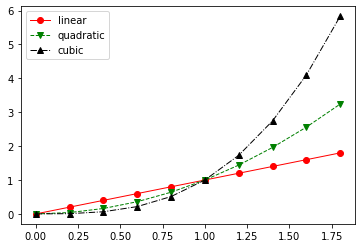

In [1]:
import matplotlib.pyplot as plt

x = [2 * i / 10 for i in range(10)]
y1 = [i for i in x]
y2 = [i**2 for i in x]
y3 = [i**3 for i in x]

fig, ax = plt.subplots()
# Немного поэкспериментируем со стилями самих графиков
ax.plot(x, y1, label='linear', marker='o', linestyle='-', color='red', linewidth=1)
ax.plot(x, y2, label='quadratic', marker='v', linestyle='--', color='green', linewidth=1)
ax.plot(x, y3, label='cubic', marker='^', linestyle='-.', color='black', linewidth=1)
ax.legend()

plt.show()

### <span style="color:#55628D">3. Подграфики</span>

In [ ]:
import matplotlib.pyplot as plt

x = [2 * i / 100 for i in range(100)]
y1 = [i for i in x]
y2 = [i**2 for i in x]
y3 = [i**3 for i in x]

# А теперь создадим одно изображение, на котором будет несколько графиков
fig, axs = plt.subplots(nrows=1, ncols=3)
# Теперь в axs - набор "осей", в кокторых мы построим свои y(x) по отдельности
axs[0].plot(x, y1, label='linear')
axs[1].plot(x, y2, label='quadratic')
axs[2].plot(x, y3, label='cubic')

# Можно при желании перебирать оси в цикле, иногда это удобно
for ax in axs:
    ax.set_xlabel('x label')
    ax.set_ylabel('y label')
    ax.legend()
    ax.set_title("Smth")

# Всё изображение целиком тоже подпишем
fig.suptitle("Several subplots", size=18)

plt.show()

### <span style="color:#55628D">4. Диаграммы</span>

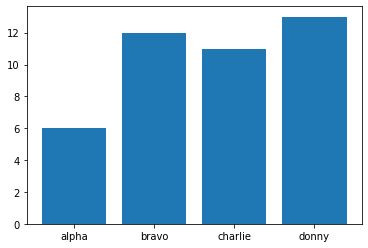

In [2]:
import matplotlib.pyplot as plt

# Это наши данные
data = {'alpha': 6, 'bravo': 12, 'charlie': 11, 'donny': 13}

# Барчарт строится немного неочевидным образом. Это не самая сильная сторона mpl.

# Это номера столбиков ("координаты по ОХ")
bar_numbers = range(len(data))
# Это подписи столбиков
labels = list(data.keys())
# Это значения столбиков
values = list(data.values())

fig, ax = plt.subplots()

# Сама картинка барчарта строится из номеров столбиков и их значений
ax.bar(bar_numbers, values)
# Потом на оси ОХ задаются положения отсечек с подписями
ax.set_xticks(bar_numbers)
# И текст этих подписей
ax.set_xticklabels(labels)

plt.show()

### <span style="color:#55628D">5. Сохранение изображения</span>

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [7, 12, 56, 8]

fig, ax = plt.subplots()

ax.plot(x, y)

# Построенный график можно сохранить вместо показа на экране
plt.savefig("test.png")

### <span style="color:#0ab49a">Примечание №1.</span> <span style="color:#BA77D8">Анимация</span> 



### <span style="color:#0ab49a">Примечание №2.</span> <span style="color:#BA77D8">Plotly, Vedo</span> 

